# **Ejemplo implementación GAN (Generative Adversarial Network)**

Ejemplo de implementación de una red generativa adversarial (GAN) utilizando Python, junto con las librerías PyTorch y OpenCV. El modelo incluye un generador, encargado de crear imágenes aleatorias, y un discriminador, que evalúa su autenticidad, contrastándolas tanto con secuencias numéricas como con imágenes reales de radiografías.

In [1]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 854.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

# **Generación y comparación de secuencias numéricas**

In [2]:
# Importaciones
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [3]:
# Generador
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, img_size * img_size),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), 1, img_size, img_size)

In [4]:
# Discriminador
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(img_size * img_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        flat = img.view(img.size(0), -1)
        return self.model(flat)

In [5]:
# Mostrar imágenes generadas por la GAN
def show_generated(generator, n=25):
    generator.eval()
    z = torch.randn(n, latent_dim).to(device)
    with torch.no_grad():
        imgs = generator(z).cpu()
    grid = make_grid(imgs, nrow=5, normalize=True)
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1, 2, 0).numpy(), cmap="gray")
    plt.axis("off")
    plt.title("Dígitos generados por el GAN")
    plt.show()

In [6]:
# Comparar imágenes reales vs generadas por la GAN
def show_real_vs_generated(real_loader, generator, latent_dim=100, n_images=16):
    # Obtener imágenes reales
    real_imgs, _ = next(iter(real_loader))
    real_imgs = real_imgs[:n_images]

    # Generar imágenes falsas
    generator.eval()
    with torch.no_grad():
        z = torch.randn(n_images, latent_dim).to(device)
        fake_imgs = generator(z).cpu()

    # Crear una cuadrícula combinada: reales arriba, generadas abajo
    combined = torch.cat([real_imgs, fake_imgs], dim=0)
    grid = make_grid(combined, nrow=n_images, normalize=True, pad_value=1)

    # Mostrar
    plt.figure(figsize=(n_images, 4))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis("off")
    plt.title("🔹 Reales (arriba) vs 🔸 Generadas (abajo)")
    plt.show()

In [7]:
# Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 100
batch_size = 128
img_size = 28
epochs = 80

In [8]:
# Transformaciones
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # rango [-1, 1]
])

In [9]:
# Dataset
dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.36MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.81MB/s]


In [10]:
# Inicialización
generator = Generator().to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

[Epoch 1/80] D_loss: 0.3182, G_loss: 1.5112
[Epoch 2/80] D_loss: 0.4248, G_loss: 1.6747
[Epoch 3/80] D_loss: 0.4225, G_loss: 1.5316
[Epoch 4/80] D_loss: 0.4734, G_loss: 1.4226
[Epoch 5/80] D_loss: 0.4139, G_loss: 1.8913
[Epoch 6/80] D_loss: 0.5730, G_loss: 1.5020
[Epoch 7/80] D_loss: 0.4187, G_loss: 1.5378
[Epoch 8/80] D_loss: 0.3877, G_loss: 1.7283
[Epoch 9/80] D_loss: 0.4131, G_loss: 2.1155
[Epoch 10/80] D_loss: 0.5142, G_loss: 1.4700


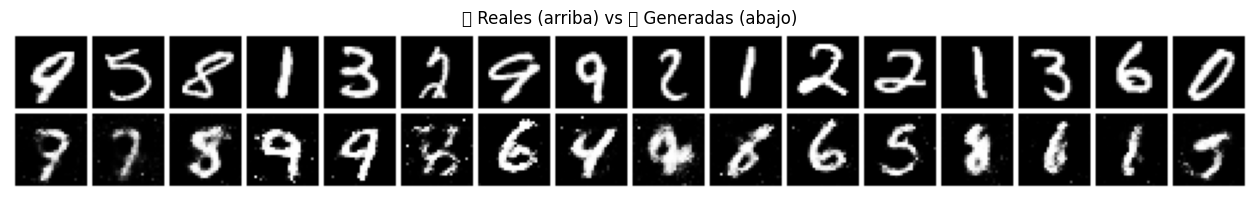

[Epoch 11/80] D_loss: 0.4163, G_loss: 2.0182
[Epoch 12/80] D_loss: 0.4048, G_loss: 2.0908
[Epoch 13/80] D_loss: 0.4015, G_loss: 1.7370
[Epoch 14/80] D_loss: 0.3849, G_loss: 1.8337
[Epoch 15/80] D_loss: 0.4568, G_loss: 1.3383
[Epoch 16/80] D_loss: 0.4742, G_loss: 1.5360
[Epoch 17/80] D_loss: 0.5212, G_loss: 1.1800
[Epoch 18/80] D_loss: 0.4188, G_loss: 1.3896
[Epoch 19/80] D_loss: 0.5076, G_loss: 1.7452
[Epoch 20/80] D_loss: 0.5068, G_loss: 1.0749


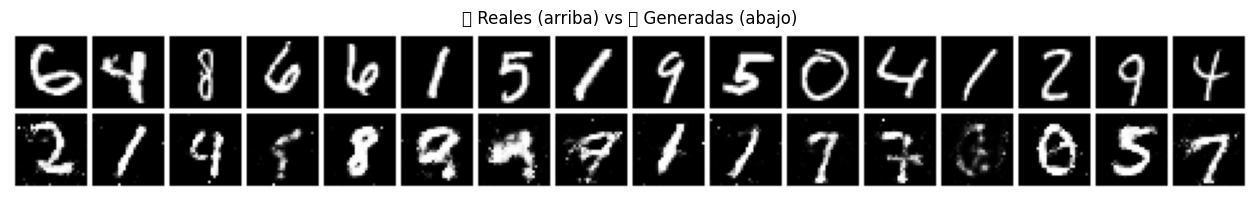

[Epoch 21/80] D_loss: 0.4795, G_loss: 1.8204
[Epoch 22/80] D_loss: 0.4904, G_loss: 1.7344
[Epoch 23/80] D_loss: 0.4618, G_loss: 1.4360
[Epoch 24/80] D_loss: 0.5222, G_loss: 1.4651
[Epoch 25/80] D_loss: 0.4488, G_loss: 1.5029
[Epoch 26/80] D_loss: 0.4967, G_loss: 1.4210
[Epoch 27/80] D_loss: 0.3895, G_loss: 1.6322
[Epoch 28/80] D_loss: 0.4184, G_loss: 1.6128
[Epoch 29/80] D_loss: 0.3844, G_loss: 1.7711
[Epoch 30/80] D_loss: 0.5419, G_loss: 1.2229


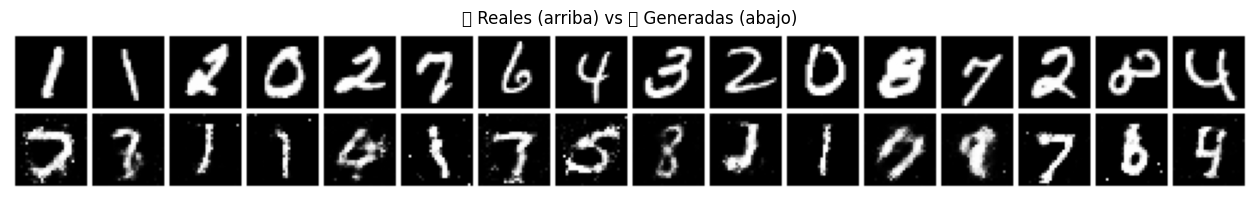

[Epoch 31/80] D_loss: 0.5247, G_loss: 1.3999
[Epoch 32/80] D_loss: 0.4317, G_loss: 1.4947
[Epoch 33/80] D_loss: 0.4330, G_loss: 1.2927
[Epoch 34/80] D_loss: 0.4869, G_loss: 1.2999
[Epoch 35/80] D_loss: 0.5337, G_loss: 1.6818
[Epoch 36/80] D_loss: 0.5788, G_loss: 1.5153
[Epoch 37/80] D_loss: 0.4955, G_loss: 1.0749
[Epoch 38/80] D_loss: 0.4627, G_loss: 1.3462
[Epoch 39/80] D_loss: 0.5776, G_loss: 1.5591
[Epoch 40/80] D_loss: 0.4671, G_loss: 1.1190


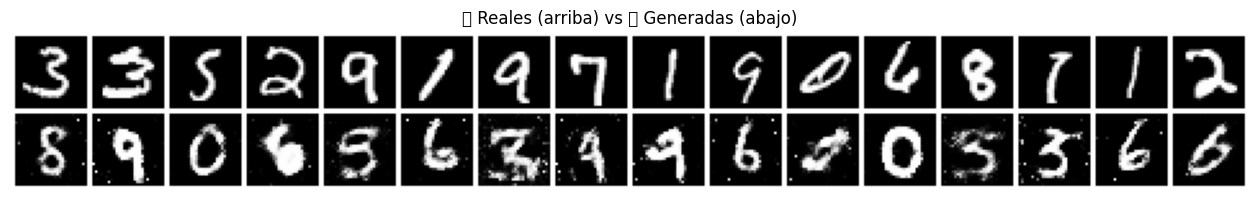

[Epoch 41/80] D_loss: 0.5099, G_loss: 1.5556
[Epoch 42/80] D_loss: 0.4270, G_loss: 1.6875
[Epoch 43/80] D_loss: 0.4971, G_loss: 1.3540
[Epoch 44/80] D_loss: 0.6176, G_loss: 1.6224
[Epoch 45/80] D_loss: 0.5246, G_loss: 1.3326
[Epoch 46/80] D_loss: 0.4702, G_loss: 1.1309
[Epoch 47/80] D_loss: 0.4589, G_loss: 1.7090
[Epoch 48/80] D_loss: 0.4278, G_loss: 1.3978
[Epoch 49/80] D_loss: 0.4915, G_loss: 1.2863
[Epoch 50/80] D_loss: 0.5351, G_loss: 1.1623


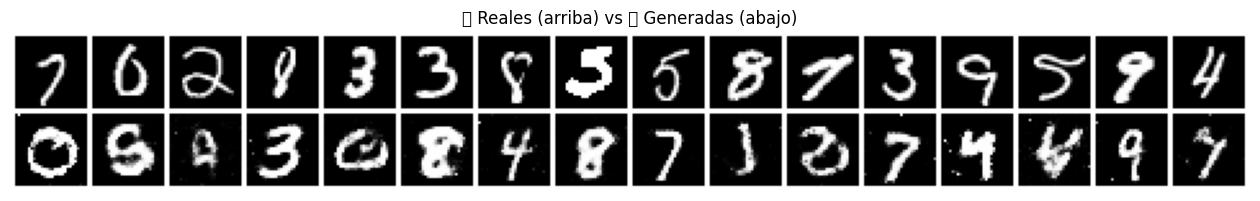

[Epoch 51/80] D_loss: 0.5121, G_loss: 1.3471
[Epoch 52/80] D_loss: 0.4731, G_loss: 1.3437
[Epoch 53/80] D_loss: 0.4998, G_loss: 1.5748
[Epoch 54/80] D_loss: 0.4543, G_loss: 1.4262
[Epoch 55/80] D_loss: 0.5084, G_loss: 1.5041
[Epoch 56/80] D_loss: 0.5269, G_loss: 1.4227
[Epoch 57/80] D_loss: 0.5313, G_loss: 1.1932
[Epoch 58/80] D_loss: 0.4853, G_loss: 1.6148
[Epoch 59/80] D_loss: 0.4916, G_loss: 1.7704
[Epoch 60/80] D_loss: 0.5401, G_loss: 1.3404


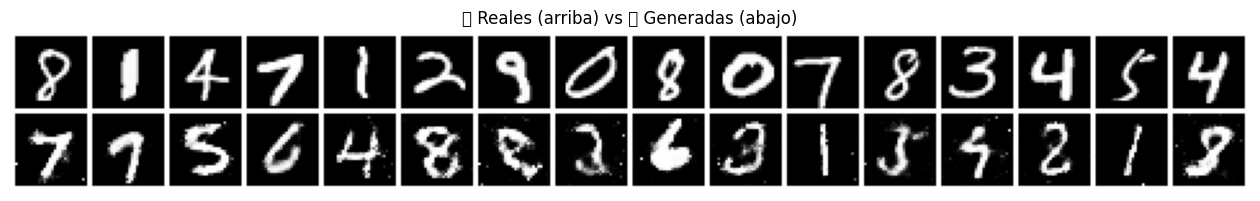

[Epoch 61/80] D_loss: 0.5212, G_loss: 1.1941
[Epoch 62/80] D_loss: 0.5055, G_loss: 1.1477
[Epoch 63/80] D_loss: 0.4832, G_loss: 1.3698
[Epoch 64/80] D_loss: 0.4309, G_loss: 1.3330
[Epoch 65/80] D_loss: 0.5109, G_loss: 1.4870
[Epoch 66/80] D_loss: 0.4645, G_loss: 1.5857
[Epoch 67/80] D_loss: 0.5274, G_loss: 1.4914
[Epoch 68/80] D_loss: 0.5140, G_loss: 1.1850
[Epoch 69/80] D_loss: 0.5140, G_loss: 1.4602
[Epoch 70/80] D_loss: 0.5989, G_loss: 1.3501


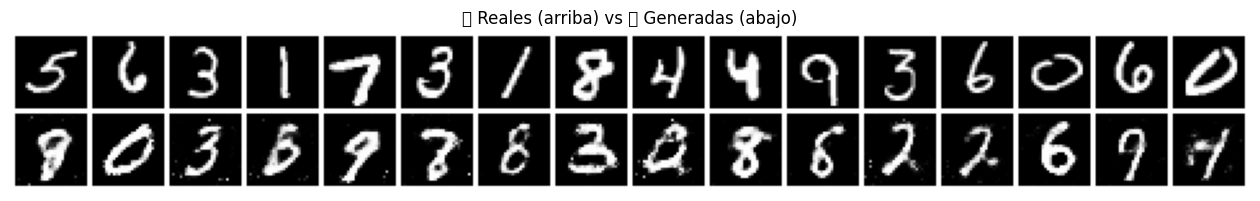

[Epoch 71/80] D_loss: 0.5038, G_loss: 1.6947
[Epoch 72/80] D_loss: 0.5024, G_loss: 1.4304
[Epoch 73/80] D_loss: 0.5880, G_loss: 1.0075
[Epoch 74/80] D_loss: 0.5514, G_loss: 1.4222
[Epoch 75/80] D_loss: 0.5442, G_loss: 1.5935
[Epoch 76/80] D_loss: 0.5191, G_loss: 1.4667
[Epoch 77/80] D_loss: 0.4944, G_loss: 1.5541
[Epoch 78/80] D_loss: 0.5310, G_loss: 1.3569
[Epoch 79/80] D_loss: 0.4985, G_loss: 1.2885
[Epoch 80/80] D_loss: 0.6202, G_loss: 1.0252


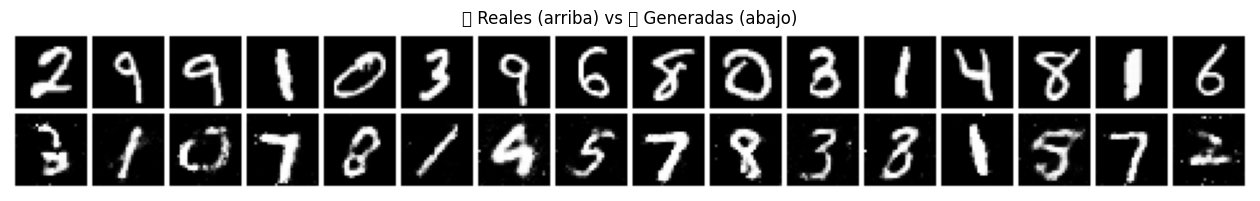

In [12]:
# Entrenamiento
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        valid = torch.ones(real_imgs.size(0), 1).to(device)
        fake = torch.zeros(real_imgs.size(0), 1).to(device)

        # Entrenar Generador
        optimizer_G.zero_grad()
        z = torch.randn(real_imgs.size(0), latent_dim).to(device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Entrenar Discriminador
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

    # Guardar muestra de imágenes generadas
    if (epoch + 1) % 10 == 0:
        show_real_vs_generated(dataloader, generator)

# **Generación y Comparación de radiografías**

In [13]:
!pip install kagglehub torch torchvision matplotlib opencv-python

In [30]:
# Importaciones
import os
import kagglehub
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

In [65]:
# Generador
class Generator_RX(nn.Module):
    def __init__(self, latent_dim=100, image_channels=1):
        super().__init__()
        self.net = nn.Sequential(
            # Entrada: (B, latent_dim, 1, 1)
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0),  # → 4x4
            nn.BatchNorm2d(512), nn.ReLU(),

            nn.ConvTranspose2d(512, 256, 4, 2, 1),  # → 8x8
            nn.BatchNorm2d(256), nn.ReLU(),

            nn.ConvTranspose2d(256, 128, 4, 2, 1),  # → 16x16
            nn.BatchNorm2d(128), nn.ReLU(),

            nn.ConvTranspose2d(128, 64, 4, 2, 1),   # → 32x32
            nn.BatchNorm2d(64), nn.ReLU(),

            nn.ConvTranspose2d(64, image_channels, 4, 2, 1),  # → 64x64
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

In [58]:
# Discriminador
class Discriminator_RX(nn.Module):
    def __init__(self, image_channels=1, image_size=64):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(image_channels, 64, 4, 2, 1),   # → 32x32
            nn.LeakyReLU(0.2), nn.Dropout(0.3),

            nn.Conv2d(64, 128, 4, 2, 1),              # → 16x16
            nn.LeakyReLU(0.2), nn.Dropout(0.3),

            nn.Conv2d(128, 128, 4, 2, 1),             # → 8x8
            nn.LeakyReLU(0.2), nn.Dropout(0.3),

            nn.Conv2d(128, 128, 4, 2, 1),             # → 4x4
            nn.LeakyReLU(0.2), nn.Dropout(0.3),

            nn.Conv2d(128, 128, 4, 2, 1),             # → 2x2
            nn.LeakyReLU(0.2), nn.Dropout(0.3)
        )

        # Calcula automáticamente el tamaño de entrada al Linear
        with torch.no_grad():
            dummy = torch.zeros(1, image_channels, image_size, image_size)
            out = self.conv(dummy)
            self.flatten_dim = out.view(1, -1).shape[1]

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.flatten_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

In [31]:
# Comparar imágenes reales vs generadas
def compare_real_vs_generated(real_loader, generator, epoch, latent_dim=100, n_images=16):
    real_imgs, _ = next(iter(real_loader))
    real_imgs = real_imgs[:n_images]

    generator.eval()
    with torch.no_grad():
        z = torch.randn(n_images, latent_dim, 1, 1).to(device)
        fake_imgs = generator(z).cpu()

    combined = torch.cat([real_imgs, fake_imgs], dim=0)
    grid = make_grid(combined, nrow=n_images, normalize=True, pad_value=1)

    plt.figure(figsize=(n_images, 4))
    plt.imshow(grid.permute(1, 2, 0), cmap="gray")
    plt.axis("off")
    plt.title(f"Reales (arriba) vs Generadas (abajo) - Epoch {epoch}")
    plt.show()

In [15]:
# Crear carpeta para credenciales
os.makedirs("/root/.kaggle", exist_ok=True)

In [16]:
# Copiar archivo kaggle API Key
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [19]:
# Descarga el dataset de radiografías
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Dataset descargado en:", path)

Dataset descargado en: /kaggle/input/chest-xray-pneumonia


In [21]:
img_size = 64
batch_size = 64

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [22]:
# Cargar solo imágenes normales del set de entrenamiento
dataset = datasets.ImageFolder(
    root=f"{path}/chest_xray/train",
    transform=transform
)

In [23]:
# Filtrar solo clase 'NORMAL'
normal_idx = [i for i, (img, label) in enumerate(dataset) if dataset.classes[label] == 'NORMAL']
subset = torch.utils.data.Subset(dataset, normal_idx)
dataloader = DataLoader(subset, batch_size=batch_size, shuffle=True)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 100
channels = 1

In [69]:
# Parámetros
generator = Generator_RX().to(device)
discriminator = Discriminator_RX(image_channels=channels, image_size=img_size).to(device)
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
epochs = 80
os.makedirs("generated_images", exist_ok=True)

[Epoch 1/80] D_loss: 0.0064 | G_loss: 5.2742
[Epoch 2/80] D_loss: 0.0001 | G_loss: 13.5438
[Epoch 3/80] D_loss: 0.0000 | G_loss: 50.5064
[Epoch 4/80] D_loss: 0.0000 | G_loss: 43.3883
[Epoch 5/80] D_loss: 0.0001 | G_loss: 43.8410
[Epoch 6/80] D_loss: 0.0000 | G_loss: 36.7801
[Epoch 7/80] D_loss: 0.0013 | G_loss: 32.6550
[Epoch 8/80] D_loss: 0.0128 | G_loss: 25.1951
[Epoch 9/80] D_loss: 0.0041 | G_loss: 17.0640
[Epoch 10/80] D_loss: 0.0003 | G_loss: 9.3985


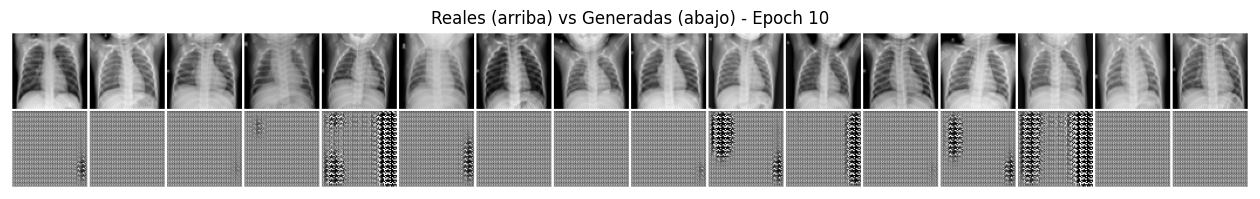

[Epoch 11/80] D_loss: 0.0008 | G_loss: 11.9070
[Epoch 12/80] D_loss: 0.0225 | G_loss: 5.7274
[Epoch 13/80] D_loss: 0.0334 | G_loss: 6.5812
[Epoch 14/80] D_loss: 0.0477 | G_loss: 9.6690
[Epoch 15/80] D_loss: 0.1939 | G_loss: 3.8358
[Epoch 16/80] D_loss: 0.0752 | G_loss: 5.2634
[Epoch 17/80] D_loss: 0.3601 | G_loss: 4.4733
[Epoch 18/80] D_loss: 0.0385 | G_loss: 6.0233
[Epoch 19/80] D_loss: 0.1404 | G_loss: 4.1276
[Epoch 20/80] D_loss: 0.0690 | G_loss: 5.4302


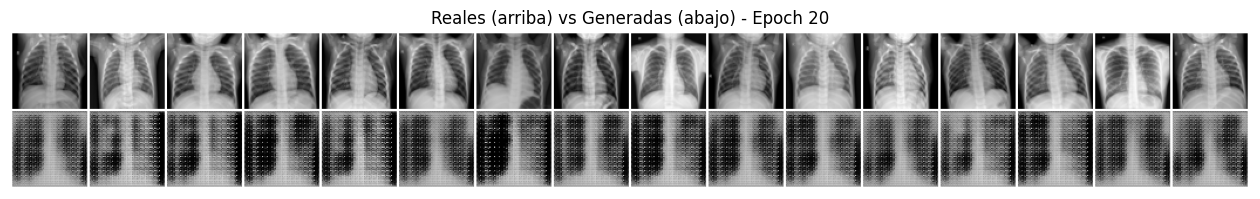

[Epoch 21/80] D_loss: 0.0043 | G_loss: 6.5827
[Epoch 22/80] D_loss: 0.0212 | G_loss: 7.1851
[Epoch 23/80] D_loss: 0.0365 | G_loss: 15.0097
[Epoch 24/80] D_loss: 0.0320 | G_loss: 8.3564
[Epoch 25/80] D_loss: 0.0905 | G_loss: 5.8365
[Epoch 26/80] D_loss: 0.2781 | G_loss: 3.4083
[Epoch 27/80] D_loss: 0.0141 | G_loss: 5.5689
[Epoch 28/80] D_loss: 0.1915 | G_loss: 5.1842
[Epoch 29/80] D_loss: 0.1277 | G_loss: 3.3853
[Epoch 30/80] D_loss: 0.3787 | G_loss: 1.9137


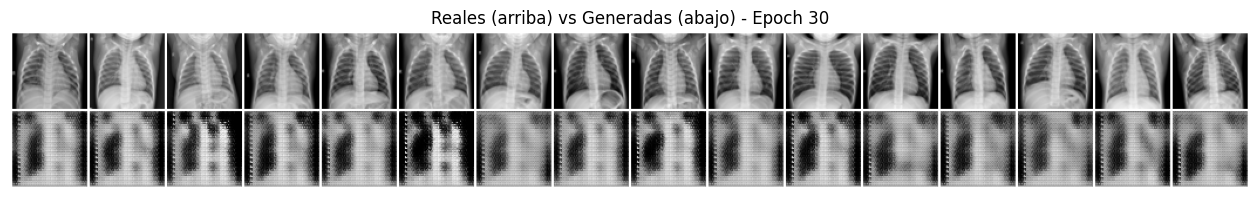

[Epoch 31/80] D_loss: 0.1019 | G_loss: 4.8781
[Epoch 32/80] D_loss: 0.4819 | G_loss: 2.3224
[Epoch 33/80] D_loss: 0.3688 | G_loss: 3.0940
[Epoch 34/80] D_loss: 0.0677 | G_loss: 4.2888
[Epoch 35/80] D_loss: 0.1001 | G_loss: 4.7842
[Epoch 36/80] D_loss: 0.6362 | G_loss: 2.0338
[Epoch 37/80] D_loss: 0.4274 | G_loss: 1.8415
[Epoch 38/80] D_loss: 0.1233 | G_loss: 2.9425
[Epoch 39/80] D_loss: 0.0977 | G_loss: 3.5295
[Epoch 40/80] D_loss: 0.2185 | G_loss: 2.9939


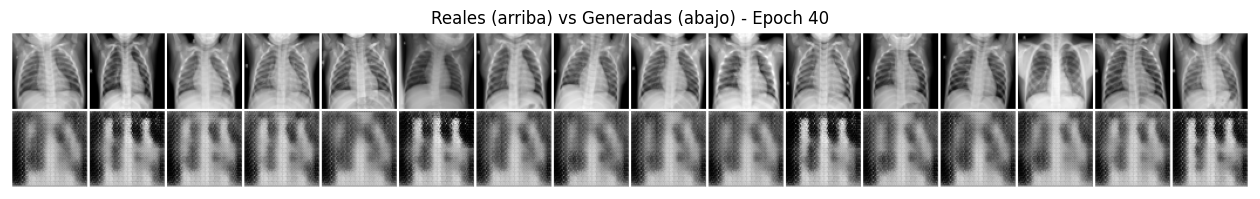

[Epoch 41/80] D_loss: 0.1236 | G_loss: 2.9995
[Epoch 42/80] D_loss: 0.0419 | G_loss: 5.1701
[Epoch 43/80] D_loss: 0.1827 | G_loss: 2.7830
[Epoch 44/80] D_loss: 0.3373 | G_loss: 2.1029
[Epoch 45/80] D_loss: 0.1099 | G_loss: 4.5306
[Epoch 46/80] D_loss: 0.0798 | G_loss: 3.5309
[Epoch 47/80] D_loss: 0.1210 | G_loss: 3.7867
[Epoch 48/80] D_loss: 0.0623 | G_loss: 3.6477
[Epoch 49/80] D_loss: 0.0830 | G_loss: 3.4501
[Epoch 50/80] D_loss: 0.1836 | G_loss: 2.6532


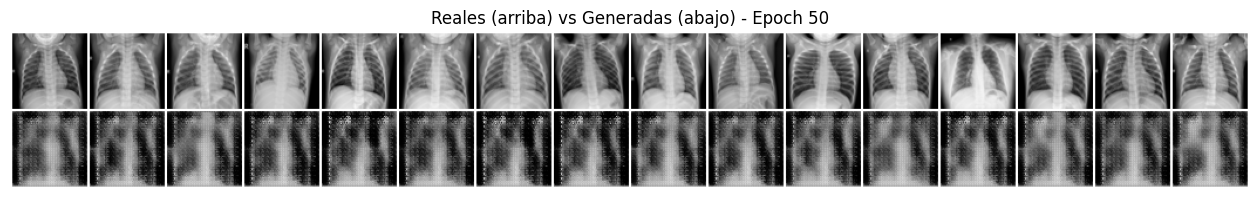

[Epoch 51/80] D_loss: 0.4116 | G_loss: 3.0055
[Epoch 52/80] D_loss: 0.0441 | G_loss: 4.1260
[Epoch 53/80] D_loss: 0.1853 | G_loss: 4.0478
[Epoch 54/80] D_loss: 0.1000 | G_loss: 3.9498
[Epoch 55/80] D_loss: 0.4442 | G_loss: 4.9720
[Epoch 56/80] D_loss: 0.1806 | G_loss: 2.3648
[Epoch 57/80] D_loss: 0.4513 | G_loss: 3.3480
[Epoch 58/80] D_loss: 0.1357 | G_loss: 2.4739
[Epoch 59/80] D_loss: 0.3379 | G_loss: 1.9993
[Epoch 60/80] D_loss: 0.0779 | G_loss: 3.1598


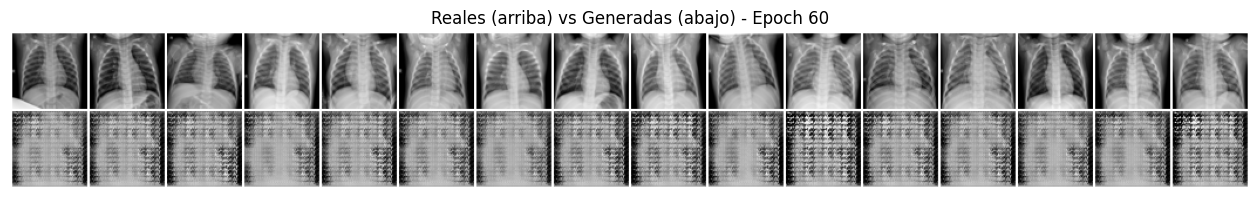

[Epoch 61/80] D_loss: 0.1950 | G_loss: 2.6235
[Epoch 62/80] D_loss: 0.1870 | G_loss: 5.0106
[Epoch 63/80] D_loss: 0.0582 | G_loss: 3.0976
[Epoch 64/80] D_loss: 0.3429 | G_loss: 2.8789
[Epoch 65/80] D_loss: 0.1735 | G_loss: 3.0571
[Epoch 66/80] D_loss: 0.0685 | G_loss: 6.1089
[Epoch 67/80] D_loss: 0.2072 | G_loss: 2.6670
[Epoch 68/80] D_loss: 0.0305 | G_loss: 3.9212
[Epoch 69/80] D_loss: 0.1929 | G_loss: 3.5093
[Epoch 70/80] D_loss: 0.2530 | G_loss: 3.2710


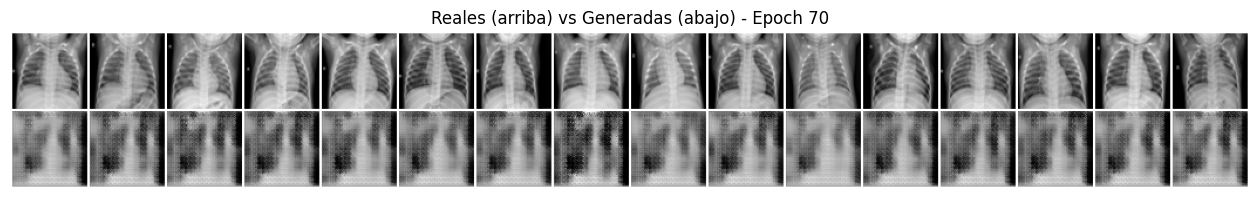

[Epoch 71/80] D_loss: 0.1463 | G_loss: 3.3394
[Epoch 72/80] D_loss: 0.5462 | G_loss: 2.7223
[Epoch 73/80] D_loss: 0.2433 | G_loss: 3.1115
[Epoch 74/80] D_loss: 0.1563 | G_loss: 4.7253
[Epoch 75/80] D_loss: 0.1465 | G_loss: 2.7187
[Epoch 76/80] D_loss: 0.0993 | G_loss: 3.7577
[Epoch 77/80] D_loss: 0.3324 | G_loss: 4.0077
[Epoch 78/80] D_loss: 0.1716 | G_loss: 4.4015
[Epoch 79/80] D_loss: 0.1049 | G_loss: 4.7229
[Epoch 80/80] D_loss: 0.1988 | G_loss: 2.9976


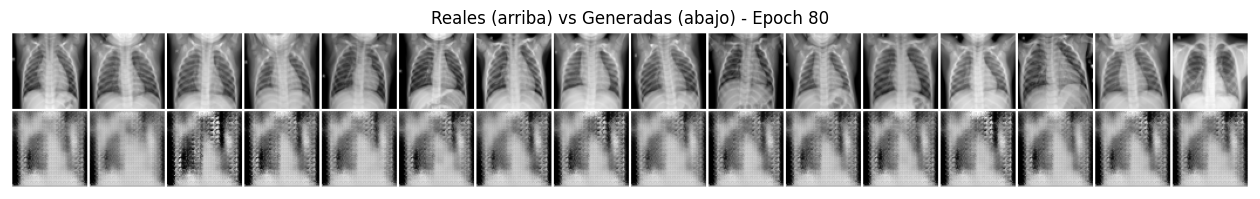

In [70]:
# Entrenamiento
for epoch in range(epochs):
    for imgs, _ in dataloader:
        real_imgs = imgs.to(device)
        valid = torch.ones(imgs.size(0), 1).to(device)
        fake = torch.zeros(imgs.size(0), 1).to(device)

        # Generador
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), latent_dim, 1, 1).to(device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Discriminador
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {d_loss.item():.4f} | G_loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
        save_image(gen_imgs[:25], f"generated_images/sample_{epoch+1:03d}.png", nrow=5, normalize=True)
        # Comparar imágenes reales vs generadas
        compare_real_vs_generated(dataloader, generator, epoch+1)